In [58]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import split_scale
import wrangle
import env
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler

In [105]:
def plot_variable_pairs(df):
    g = sns.PairGrid(train)
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)

In [104]:
df = wrangle.wrangle_telco()
df

,customer_id,monthly_charges,total_charges,tenure
0,0013-SMEOE,109.70,7904.25,71
1,0014-BMAQU,84.65,5377.80,63
2,0016-QLJIS,90.45,5957.90,65
3,0017-DINOC,45.20,2460.55,54
4,0017-IUDMW,116.80,8456.75,72
5,0019-EFAEP,101.30,7261.25,72
6,0019-GFNTW,45.05,2560.10,56
7,0020-INWCK,95.75,6849.40,71
8,0040-HALCW,20.40,1090.60,54
9,0042-RLHYP,19.70,1396.90,69


In [68]:
wrangled = split_scale.split_my_data(wrangled['monthly_charges'], wrangled['tenure'], .7, 69)

In [79]:
x_train = pd.DataFrame(wrangled[0])
x_test = pd.DataFrame(wrangled[1])
y_train = pd.DataFrame(wrangled[2])
y_test = pd.DataFrame(wrangled[3])

train = x_train.join(y_train)
test = x_test.join(y_test)

In [37]:
split_wrangle_x = split_scale.standard_scaler(x_train, x_test)
split_wrangle_y = split_scale.standard_scaler(y_train, y_test)

In [84]:
split_x_train = split_wrangle_x[1]
split_x_test = split_wrangle_x[2]
split_y_train = split_wrangle_y[1]
split_y_test = split_wrangle_y[2]
split_train = split_x_train.join(split_y_train)
split_test = split_x_test.join(split_y_test)

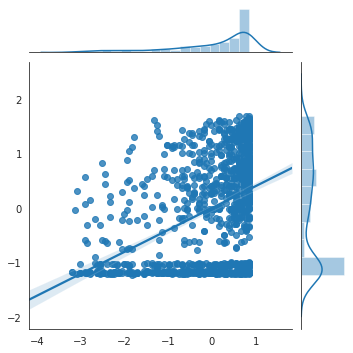

In [96]:
with sns.axes_style('white'):
    j = sns.jointplot(split_y_train, split_x_train, kind='reg', height=5);
plt.show()

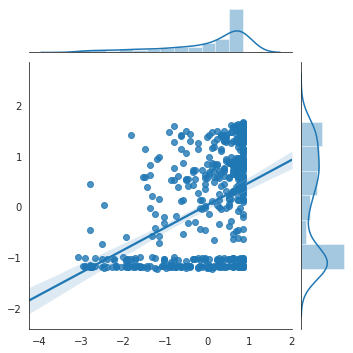

In [49]:
with sns.axes_style('white'):
    j = sns.jointplot(split_y_test, split_, kind='reg', height=5);
plt.show()

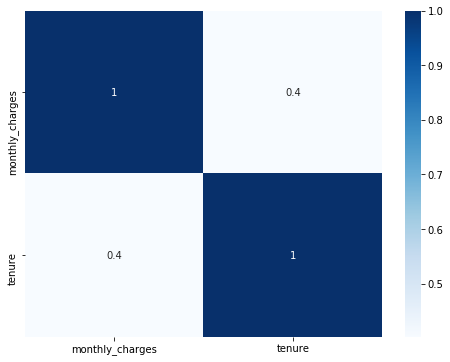

In [102]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)